In [68]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sn
print(sklearn.__version__)

0.20.3


In [69]:
# read in the data
dsa = pd.read_csv('dsa.csv')

In [70]:
# review the shape of original input data
print('\nBanks DataFrame (View of first and last few rows)')
print(dsa.head(10))
print(dsa.tail(10))
print('\nBanks DataFrame (Info on data)')
print(dsa.info())
print('\nBanks DataFrame (View of bank data shape)')
print(dsa.shape)


Banks DataFrame (View of first and last few rows)
   age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  pdays  previous     poutcome  \
0  telephone   may         mon  ...    999         0  

In [71]:
# review data summary for missing values
#dsa.isnull()
dsa.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

In [72]:
# drop observations with missing data, if any
# nothing to drop for this model
# dsa.dropna()

# examine the shape of input data after dropping missing data
# print('\nBanks DataFrame New Shape')
# print(dsa.shape)

# look at the list of column names, note that y is the response
print('\nBanks DataFrame Columns List')
list(dsa.columns.values)



Banks DataFrame Columns List


['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'ModelPrediction',
 'y']

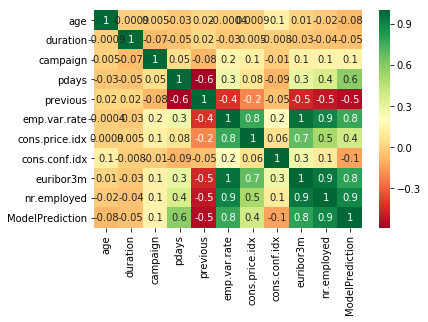

In [73]:
# review correlation matrix for continuous values
corrMatrix = dsa.corr()
sn.heatmap(corrMatrix, cmap='RdYlGn', fmt = '.1g', annot=True)
plt.show()

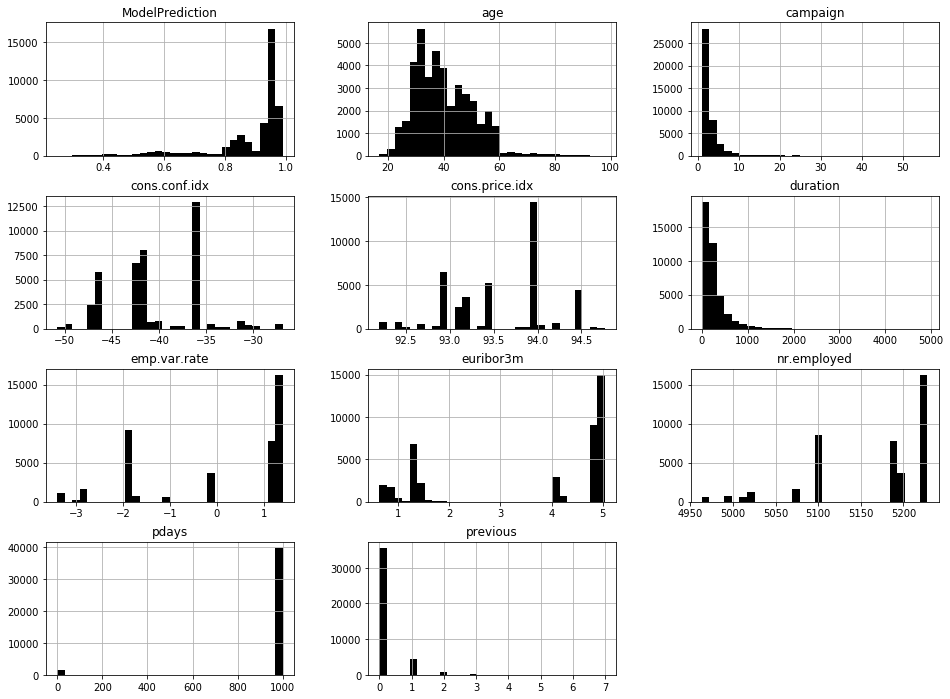

In [74]:
# quick view to see where the data falls on continuous variables
dsa.hist(bins=30, figsize=(16,12), color='#000000')
plt.show()

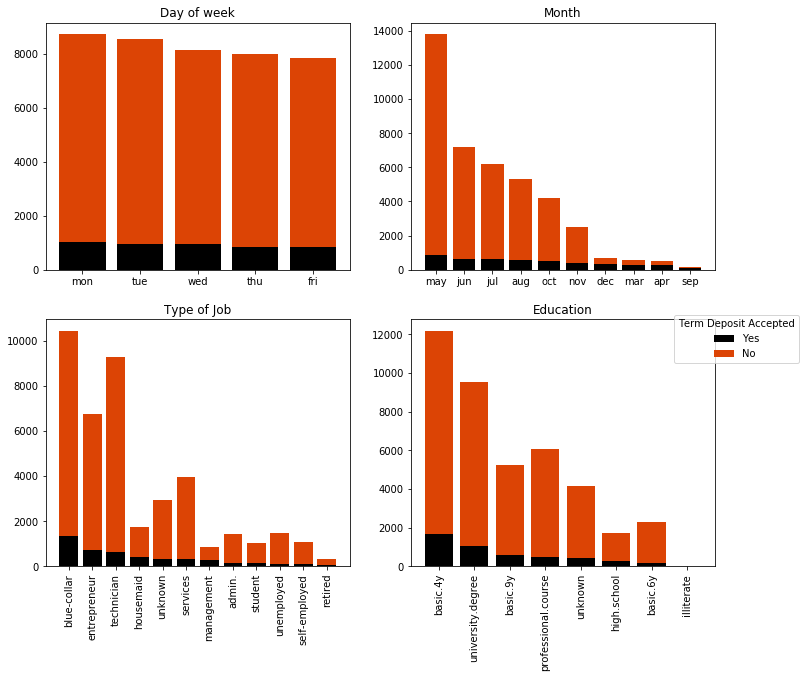

In [75]:
#THIS CODE IS TAKEN FROM SEVERAL ONLINE EXAMPLES INVOLVING THE SAME CASE STUDY
#THE ORIGINAL SOURCE CODE IS UNCLEAR
# I prefer to write most of my own code, but for initial review, 
# below are the best visual representation of categorical data.

yes = dsa[dsa['y'] == 'yes'] #yes
no = dsa[dsa['y'] == 'no'] #no

fig, ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(yes['day_of_week'].unique(),height = yes['day_of_week'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(no['day_of_week'].unique(),height = no['day_of_week'].value_counts(),bottom = yes['day_of_week'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Day of week')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(yes['month'].unique(),height = yes['month'].value_counts(),color='#000000')
ax[0, 1].bar(no['month'].unique(),height = no['month'].value_counts(),bottom = yes['month'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Month')
ax[1, 0].bar(yes['job'].unique(),height = yes['job'].value_counts(),color='#000000')
ax[1, 0].bar(yes['job'].unique(),height = no['job'].value_counts()[yes['job'].value_counts().index],bottom = yes['job'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)
ax[1, 1].bar(yes['education'].unique(),height = yes['education'].value_counts(),color='#000000') #row=0, col=1
ax[1, 1].bar(yes['education'].unique(),height = no['education'].value_counts()[yes['education'].value_counts().index],bottom = yes['education'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="center right",title = "Term Deposit Accepted")
plt.show()

In [76]:
# check basic stats
print('\nBanks DataFrame Column Statistics')
dsa.describe().T


Banks DataFrame Column Statistics


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000000,32.000000,38.000000,47.000000,98.00000
duration,41188.0,258.285010,259.279249,0.000000,102.000000,180.000000,319.000000,4918.00000
campaign,41188.0,2.567593,2.770014,1.000000,1.000000,2.000000,3.000000,56.00000
pdays,41188.0,962.475454,186.910907,0.000000,999.000000,999.000000,999.000000,999.00000
previous,41188.0,0.172963,0.494901,0.000000,0.000000,0.000000,0.000000,7.00000
emp.var.rate,41188.0,0.081886,1.570960,-3.400000,-1.800000,1.100000,1.400000,1.40000
cons.price.idx,41188.0,93.575664,0.578840,92.201000,93.075000,93.749000,93.994000,94.76700
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800000,-42.700000,-41.800000,-36.400000,-26.90000
euribor3m,41188.0,3.621291,1.734447,0.634000,1.344000,4.857000,4.961000,5.04500
nr.employed,41188.0,5167.035911,72.251528,4963.600000,5099.100000,5191.000000,5228.100000,5228.10000


In [77]:
#Prep for further data cleaning
print('\nBank Columns Type Info')
dsa.info()


Bank Columns Type Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age                41188 non-null int64
job                41188 non-null object
marital            41188 non-null object
education          41188 non-null object
default            41188 non-null object
housing            41188 non-null object
loan               41188 non-null object
contact            41188 non-null object
month              41188 non-null object
day_of_week        41188 non-null object
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null object
emp.var.rate       41188 non-null float64
cons.price.idx     41188 non-null float64
cons.conf.idx      41188 non-null float64
euribor3m          41188 non-null float64
nr.employed        41188 non-null float64
ModelPrediction    41188 non-null float64
y    

In [78]:
'''NOTE: THIS CODE IS COMPUTATIONALLY TAXING AND HAS BEEN MOVED TO A SEPARATE PYTHON NOTEBOOK
CALLED stewart_dsa_EDA_only_2021
#Introduce interactive pivottable for on-the-fly EDA
from pivottablejs import pivot_ui
from IPython.display import HTML

#code source to remove unwanted nulls for Windows users:
#https://github.com/nicolaskruchten/jupyter_pivottablejs/issues/52#issuecomment-528409060

def pivot_ui(df, **kwargs):
    import pivottablejs
    class _DataFrame(pd.DataFrame):
        def to_csv(self, **kwargs):
            return super().to_csv(**kwargs).replace("\r\n", "\n")
    return pivottablejs.pivot_ui(_DataFrame(df), **kwargs)

pivot_ui(dsa,outfile_path='pivottablejs_dsa.html')
HTML('pivottablejs_dsa.html')'''


'NOTE: THIS CODE IS COMPUTATIONALLY TAXING AND HAS BEEN MOVED TO A SEPARATE PYTHON NOTEBOOK\nCALLED stewart_dsa_EDA_only_2021\n#Introduce interactive pivottable for on-the-fly EDA\nfrom pivottablejs import pivot_ui\nfrom IPython.display import HTML\n\n#code source to remove unwanted nulls for Windows users:\n#https://github.com/nicolaskruchten/jupyter_pivottablejs/issues/52#issuecomment-528409060\n\ndef pivot_ui(df, **kwargs):\n    import pivottablejs\n    class _DataFrame(pd.DataFrame):\n        def to_csv(self, **kwargs):\n            return super().to_csv(**kwargs).replace("\r\n", "\n")\n    return pivottablejs.pivot_ui(_DataFrame(df), **kwargs)\n\npivot_ui(dsa,outfile_path=\'pivottablejs_dsa.html\')\nHTML(\'pivottablejs_dsa.html\')'

In [79]:
#separate numerical and categorical columns
#exclude duration and model prediction; incliude response variable
num_cols = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx',
            'cons.conf.idx', 'euribor3m', 'nr.employed']

cat_cols = ['job','marital','education','default','housing','loan','contact',
            'month','day_of_week','poutcome']
 

In [80]:
#standardize/scale the numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dsa[num_cols] = scaler.fit_transform(dsa[num_cols])

# show standardization constants being employed
print('\nScalar mean', scaler.mean_)
print('\nScaler scale', scaler.scale_)


Scalar mean [ 4.00240604e+01  2.56759250e+00  9.62475454e+02  1.72962999e-01
  8.18855006e-02  9.35756644e+01 -4.05026003e+01  3.62129081e+00
  5.16703591e+03]

Scaler scale [ 10.42112347   2.76997992 186.90863833   0.49489507   1.57094067
   0.57883302   4.62814167   1.73442635  72.25065057]


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [81]:
# IF APPROPRIATE, set print options to see more columns
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#double check the numerical data updated with scaled numerical data
#and that categorical data is still untouched
dsa.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0.932750,no
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0.953579,no
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,...,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0.945724,no
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0.933875,no
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,...,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0.940996,no
5,0.477486,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0.957424,no
6,1.820911,admin.,married,professional.course,no,no,no,telephone,may,mon,...,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0.926402,no
7,0.093650,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0.956709,no
8,-1.537652,technician,single,professional.course,no,yes,no,telephone,may,mon,...,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0.931072,no
9,-1.441693,services,single,high.school,no,yes,no,telephone,may,mon,...,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0.941608,no


In [84]:
#transform categorical variables into separate columns, binary integers 
prelim_data_df = pd.get_dummies(dsa, columns=cat_cols, drop_first=True)

In [85]:
#checkthat numerical and categorical variables both scaled properly
#with data rows intact, just scaled
prelim_data_df.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,261,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
1,1.628993,149,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
2,-0.290186,226,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
3,-0.002309,151,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
4,1.533034,307,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
5,0.477486,198,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
6,1.820911,139,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
7,0.093650,217,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
8,-1.537652,380,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
9,-1.441693,50,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0


In [87]:
#confirming tail has not changed
prelim_data_df.y.tail(10)

41178    yes
41179     no
41180     no
41181    yes
41182     no
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, dtype: object

In [88]:
#transforming the yes and no strings to binary integers
prelim_data_df.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [89]:
#check tail transformation and that structure is intact
prelim_data_df.y.tail(10)

41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, dtype: int64

In [93]:
#separate existing model data for further evaluation
curr_model = prelim_data_df[['ModelPrediction', 'y']].copy()

#transform ModelPrediction into binary integer for simpler analysis against y
#source: https://stackoverflow.com/questions/35639588/most-efficient-way-to-convert-values-of-column-in-pandas-dataframe
curr_model['ModelPrediction'] = np.where(curr_model['ModelPrediction'] > 0.5, 1,0)

#ensure item is converted to number, not to string
curr_model.iloc[0]['ModelPrediction']

curr_model['ModelPrediction'].astype(float)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
        ... 
41158    1.0
41159    0.0
41160    1.0
41161    1.0
41162    1.0
41163    0.0
41164    0.0
41165    1.0
41166    1.0
41167    1.0
41168    1.0
41169    1.0
41170    1.0
41171    1.0
41172    1.0
41173    1.0
41174    0.0
41175    1.0
41176    1.0
41177    1.0
41178    0.0
41179    1.0
41180    1.0
41181    1.0
41182    0.0
41183    1.0
41184    1.0
41185    1.0
41186    1.0
41187    1.0
Name: ModelPrediction, Length: 41188, dtype: float64

In [94]:
#Introduce interactive pivottable for on-the-fly EDA FOR MODEL PREDICTION VS. Y
#in the folder of items, click the HTML file named'pivottablejs_ModelPrediction_vs_y.html'

from pivottablejs import pivot_ui
from IPython.display import HTML

def pivot_ui(df, **kwargs):
    import pivottablejs
    class _DataFrame(pd.DataFrame):
        def to_csv(self, **kwargs):
            return super().to_csv(**kwargs).replace("\r\n", "\n")
    return pivottablejs.pivot_ui(_DataFrame(df), **kwargs)

pivot_ui(curr_model,outfile_path='pivottablejs_ModelPrediction_vs_y.html')
HTML('pivottablejs_ModelPrediction_vs_y.html')


In [95]:
# Calculating the true positives, false positives, true negatives, and false negatives 
# between the current model and y
# ASSUMING THE MODEL PREDICTIONS ARE PREDICTING POSITIVES BASED ON CASE STUDY DEFINITION
# source code: https://www.python-course.eu/metrics.php
TP = 3960  #number of actual 'yes' that the model predicted (well) with high probability of 'yes'
TN = 257  #number of actual 'no' that the model predicted (well) with a low probability of 'yes'
FP = 36291  #number of actual 'no' that the model predicted (poorly) with a high probability of 'yes'
FN = 680  #number of actual 'yes' that the model predicted with a low probability of 'yes'

accuracy = (TP + TN)/(TP + TN + FP + FN)
print('\nCurrent Model Prediction Proxy for Accuracy')
print(f"accuracy: {accuracy:4.2f}")

precision = TP / (TP + FP)
print('\nCurrent Model Prediction Proxy for Precision')
print(f"precision: {precision:4.2f}")
      
recall = TP / (TP + FN)
print('\nCurrent Model Prediction Proxy for Recall')
print(f"recall: {recall:4.2f}")
      
specificity = TN / (TN + FP)
print('\nCurrent Model Prediction Proxy for Specificity')
print(f"specificity: {specificity:4.2f}")

f1_score = 2 * precision * recall / (precision + recall)
print('\nCurrent Model Prediction Proxy for F1 Harmonic Mean:')
print(f"f1_score: {f1_score:4.2f}")


Current Model Prediction Proxy for Accuracy
accuracy: 0.10

Current Model Prediction Proxy for Precision
precision: 0.10

Current Model Prediction Proxy for Recall
recall: 0.85

Current Model Prediction Proxy for Specificity
specificity: 0.01

Current Model Prediction Proxy for F1 Harmonic Mean:
f1_score: 0.18


In [25]:
prelim_data_df = prelim_data_df.sort_index(axis=1, ascending = True)

In [26]:
prelim_data_df = prelim_data_df.drop(columns=["ModelPrediction", "duration"])

In [27]:
prelim_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null float64
campaign                         41188 non-null float64
cons.conf.idx                    41188 non-null float64
cons.price.idx                   41188 non-null float64
contact_cellular                 41188 non-null uint8
contact_telephone                41188 non-null uint8
day_of_week_fri                  41188 non-null uint8
day_of_week_mon                  41188 non-null uint8
day_of_week_thu                  41188 non-null uint8
day_of_week_tue                  41188 non-null uint8
day_of_week_wed                  41188 non-null uint8
default_no                       41188 non-null uint8
default_unknown                  41188 non-null uint8
default_yes                      41188 non-null uint8
education_basic.4y               41188 non-null uint8
education_basic.6y               41188 non-null uint8
education_basic.9y 

In [28]:
prelim_data_df.shape

(41188, 63)

In [29]:
# look at the list of column names, note that y is the response
print('\nClean Data Model Columns List')
list(prelim_data_df.columns.values)


Clean Data Model Columns List


['age',
 'campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'default_no',
 'default_unknown',
 'default_yes',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'emp.var.rate',
 'euribor3m',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'mont

In [30]:
prelim_data_df = prelim_data_df.sort_index(axis=1, ascending = True)

In [31]:
prelim_data_df.tail()

,age,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,...,month_nov,month_oct,month_sep,nr.employed,pdays,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,y
41183,3.164336,-0.565922,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,0,1,0,-0.349494,1
41184,0.573445,-0.565922,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,0,1,0,-0.349494,0
41185,1.533034,-0.204909,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,0,1,0,-0.349494,0
41186,0.381527,-0.565922,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,0,1,0,-0.349494,1
41187,3.260295,0.156105,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,1,0,0,1.671136,0


In [32]:
prelim_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null float64
campaign                         41188 non-null float64
cons.conf.idx                    41188 non-null float64
cons.price.idx                   41188 non-null float64
contact_cellular                 41188 non-null uint8
contact_telephone                41188 non-null uint8
day_of_week_fri                  41188 non-null uint8
day_of_week_mon                  41188 non-null uint8
day_of_week_thu                  41188 non-null uint8
day_of_week_tue                  41188 non-null uint8
day_of_week_wed                  41188 non-null uint8
default_no                       41188 non-null uint8
default_unknown                  41188 non-null uint8
default_yes                      41188 non-null uint8
education_basic.4y               41188 non-null uint8
education_basic.6y               41188 non-null uint8
education_basic.9y 

In [33]:
prelim_data_df.rename(columns = {'cons.conf.idx':'cons_conf_idx', 'cons.price.idx':'cons_price_idx', 
                              'education_basic.4y':'education_basic_4y','education_basic.6y':'education_basic_6y',
                            'education_basic.9y':'education_basic_9y', 'education_professional.course':'education_professional_course',
                            'education_university.degree':'education_university_degree','emp.var.rate':'emp_var_rate',
                            'job_admin.':'job_admin', 'nr.employed':'nr_employed','job_blue-collar':'job_blue_collar',
                            'job_self-employed':'job_self_employed','education_high.school':'education_high_school'}, inplace = True) 

In [34]:
#np_conv = model_data.to_numpy #convert to numpy
prelim_data_df.tail(10)

,age,campaign,cons_conf_idx,cons_price_idx,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,...,month_nov,month_oct,month_sep,nr_employed,pdays,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,y
41178,2.108788,-0.204909,-2.224953,2.058168,1,0,0,0,1,0,...,1,0,0,-2.815697,-5.117342,0,0,1,5.712397,1
41179,2.300706,0.156105,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,0,1,0,-0.349494,0
41180,-0.386145,-0.204909,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,0,1,0,-0.349494,0
41181,-0.290186,-0.565922,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,0,1,0,-0.349494,1
41182,-1.057857,-0.565922,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,-5.101292,0,0,1,1.671136,0
41183,3.164336,-0.565922,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,0,1,0,-0.349494,1
41184,0.573445,-0.565922,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,0,1,0,-0.349494,0
41185,1.533034,-0.204909,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,0,1,0,-0.349494,0
41186,0.381527,-0.565922,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,0,1,0,-0.349494,1
41187,3.260295,0.156105,-2.224953,2.058168,1,0,1,0,0,0,...,1,0,0,-2.815697,0.195414,1,0,0,1.671136,0


In [36]:
#Checking structure one last time
prelim_data_df.info()
model_data = prelim_data_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null float64
campaign                         41188 non-null float64
cons_conf_idx                    41188 non-null float64
cons_price_idx                   41188 non-null float64
contact_cellular                 41188 non-null uint8
contact_telephone                41188 non-null uint8
day_of_week_fri                  41188 non-null uint8
day_of_week_mon                  41188 non-null uint8
day_of_week_thu                  41188 non-null uint8
day_of_week_tue                  41188 non-null uint8
day_of_week_wed                  41188 non-null uint8
default_no                       41188 non-null uint8
default_unknown                  41188 non-null uint8
default_yes                      41188 non-null uint8
education_basic_4y               41188 non-null uint8
education_basic_6y               41188 non-null uint8
education_basic_9y 

In [37]:
# WHEN THERE ARE FEW ENOUGH VARIABLES, I HAVE PROFESSOR'S HABITS OF MORE MANUALLY 
# CONVERTING THE PANDAS DATAFRAME TO NUMPY TO AVOID ISSUES AND BE MORE EXPLICIT
# This can help identify and avoid errors, as a double check on variables
#np_conv = model_data.to_numpy #convert to numpy more automatically
model_data = np.array([model_data.age,
 model_data.campaign,
 model_data.pdays,
 model_data.previous,
 model_data.emp_var_rate,
 model_data.cons_price_idx,
 model_data.cons_conf_idx,
 model_data.euribor3m,
 model_data.nr_employed,
 model_data.job_admin,
 model_data.job_blue_collar,
 model_data.job_entrepreneur,
 model_data.job_housemaid,
 model_data.job_management,
 model_data.job_retired,
 model_data.job_self_employed,
 model_data.job_services,
 model_data.job_student,
 model_data.job_technician,
 model_data.job_unemployed,
 model_data.job_unknown,
 model_data.marital_divorced,
 model_data.marital_married,
 model_data.marital_single,
 model_data.marital_unknown,
 model_data.education_basic_4y,
 model_data.education_basic_6y,
 model_data.education_basic_9y,
 model_data.education_high_school,
 model_data.education_illiterate,
 model_data.education_professional_course,
 model_data.education_university_degree,
 model_data.education_unknown,
 model_data.default_no,
 model_data.default_unknown,
 model_data.default_yes,
 model_data.housing_no,
 model_data.housing_unknown,
 model_data.housing_yes,
 model_data.loan_no,
 model_data.loan_unknown,
 model_data.loan_yes,
 model_data.contact_cellular,
 model_data.contact_telephone,
 model_data.month_apr,
 model_data.month_aug,
 model_data.month_dec,
 model_data.month_jul,
 model_data.month_jun,
 model_data.month_mar,
 model_data.month_may,
 model_data.month_nov,
 model_data.month_oct,
 model_data.month_sep,
 model_data.day_of_week_fri,
 model_data.day_of_week_mon,
 model_data.day_of_week_thu,
 model_data.day_of_week_tue,
 model_data.day_of_week_wed,
 model_data.poutcome_failure,
 model_data.poutcome_nonexistent,
 model_data.poutcome_success,
                      model_data.y]).T

In [38]:
# the rest of the program sets up the modeling methods
# and evaluation within a cross-validation design

# cross-validation scoring code adapted from Scikit Learn documentation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# specify the set of classifiers being evaluated
# experimented with different class_priors
# the response rate is low
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
names = ["Naive_Bayes", "Logistic_Regression"]
classifiers = [BernoulliNB(), 
               LogisticRegression()]

#ALTERNATE DATA HYPERPARAMETERS
# NAIVE BAYES #alpha=0.9, binarize=0.5, 
#                           class_prior = [0.9, 0.1], fit_prior=False
#LOGISTIC REGRESSION
#penalty = 'l1', random_state=42, max_iter = 200, solver = 'liblinear'
# check dimensions of the additive model X input and y response
print('\nData dimensions:', model_data.shape)


Data dimensions: (41188, 63)


In [39]:
# --------------------------------------------------------
# SOURCE CODE TEMPLATE FOR K FOLDS
# FROM NORTHWESTERN UNIVERSITY, DR. TOM MILLER, PROGRAM DIRECTOR OF MSDS
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
N_FOLDS = 10

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=True, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
# note that 0:model_data.shape[1]-1 slices for explanatory variables
# and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, clf in zip(names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names
print('\nAREA UNDER THE ROC CURVE RESULTS:')
print(cv_results_df)
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean())   



Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 62)
X_test: (4119, 62)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7824097157917231

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.8001895817694663

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 62)
X_test: (4119, 62)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7793880608101417

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.8060971080518966

Fold index: 2 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 62)
X_test: (4119, 62)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7693904255629874

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7970733417063411

Fold index: 3 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 62)
X_test: (4119, 62)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.763075794864146

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7889278937269093

Fold index: 4 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 62)
X_test: (4119, 62)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7723087390645129

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7806271348592071

Fold index: 5 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 62)
X_test: (4119, 62)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7670687617122178

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7906019640172526

Fold index: 6 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 62)
X_test: (4119, 62)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7650754570156527

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7910806711052918

Fold index: 7 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 62)
X_test: (4119, 62)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7639454658004339

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7850157159942545

Fold index: 8 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37070, 62)
X_test: (4118, 62)
y_train: (37070,)
y_test: (4118,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7628374530473768

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.791096268023749

Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37070, 62)
X_test: (4118, 62)
y_train: (37070,)
y_test: (4118,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7619239408161564

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7869043853325289

AREA UNDER THE ROC CURVE RESULTS:
   Naive_Bayes  Logistic_Regression
0     0.782410             0.800190
1     0.779388             0.806097
2     0.769390             0.797073
3     0.763076             0.788928
4     0.772309             0.780627
5     0.767069             0.790602
6     0.765075             0.791081
7     0.763945             0.785016
8     0.762837             0.791096
9     0.761924             0.786904

----------------------------------------------
Average results from 10-fold cross-validation

Method                 Area under ROC Curve
Naive_Bayes            0.768742
Logistic_Regression    0.791761
dtype: float64


In [41]:
# Select logistic regression for predictions
# fitting the model to the train data

log_reg = LogisticRegression()

X = model_data[:, 0:model_data.shape[1]-1]
y = model_data[:, model_data.shape[1]-1]

log_reg.fit(X, y)

# make predictions
# y_pred = log_reg.predict_proba(X)
# print(y_pred[10:50])

C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[0.97607982 0.02392018]
 [0.97089855 0.02910145]
 [0.97139478 0.02860522]
 [0.97281868 0.02718132]
 [0.97018306 0.02981694]
 [0.97068668 0.02931332]
 [0.97018306 0.02981694]
 [0.97697767 0.02302233]
 [0.97455878 0.02544122]
 [0.97598923 0.02401077]
 [0.9681293  0.0318707 ]
 [0.97895478 0.02104522]
 [0.9579779  0.0420221 ]
 [0.96731112 0.03268888]
 [0.96823668 0.03176332]
 [0.96625952 0.03374048]
 [0.96609337 0.03390663]
 [0.97707656 0.02292344]
 [0.9723978  0.0276022 ]
 [0.97793309 0.02206691]
 [0.96474843 0.03525157]
 [0.96609337 0.03390663]
 [0.96952461 0.03047539]
 [0.97702643 0.02297357]
 [0.97364692 0.02635308]
 [0.97922492 0.02077508]
 [0.97119871 0.02880129]
 [0.97021275 0.02978725]
 [0.96569637 0.03430363]
 [0.96951935 0.03048065]
 [0.95817834 0.04182166]
 [0.97044847 0.02955153]
 [0.96547015 0.03452985]
 [0.96531491 0.03468509]
 [0.97290386 0.02709614]
 [0.97316598 0.02683402]
 [0.96629399 0.03370601]
 [0.97394369 0.02605631]
 [0.96579813 0.03420187]
 [0.97503891 0.02496109]]

In [ ]:
# gauge importance
log_reg_importance = log_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(log_reg_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(log_reg_importance))], log_reg_importance)
plt.show()


In [44]:
# prelim_data_df.columns
var_names = ['age', 'campaign', 'cons_conf_idx', 'cons_price_idx',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'default_no', 'default_unknown', 'default_yes',
       'education_basic_4y', 'education_basic_6y', 'education_basic_9y',
       'education_high_school', 'education_illiterate',
       'education_professional_course', 'education_university_degree',
       'education_unknown', 'emp_var_rate', 'euribor3m', 'housing_no',
       'housing_unknown', 'housing_yes', 'job_admin', 'job_blue_collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self_employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'loan_no', 'loan_unknown', 'loan_yes',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'nr_employed', 'pdays', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'previous']

In [45]:
feat_importance_results = pd.DataFrame({'Name': var_names, 
                                  'Logistic Regression %': log_reg_importance })

feat_importance_results.sort_values('Logistic Regression %', inplace=True, ascending = False)
print(feat_importance_results)

                             Name  Logistic Regression %
49                      month_jul               1.259391
5               contact_telephone               1.108884
29               job_entrepreneur               0.475273
8                 day_of_week_thu               0.374702
7                 day_of_week_mon               0.353096
46                      month_apr               0.248150
45                marital_unknown               0.244628
14             education_basic_4y               0.212640
17          education_high_school               0.177561
61                       previous               0.149575
6                 day_of_week_fri               0.128112
42               marital_divorced               0.046088
24                     housing_no               0.038114
58               poutcome_failure               0.017520
53                      month_nov               0.011317
0                             age               0.005343
9                 day_of_week_t

In [49]:
#Drop protected classes to evaluate effectiveness of data in less biased model
slim_data = prelim_data_df.drop(columns=["age", "marital_divorced", "marital_married","marital_single","marital_unknown"])

In [50]:
slim_data.head()

,campaign,cons_conf_idx,cons_price_idx,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,...,month_nov,month_oct,month_sep,nr_employed,pdays,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,y
0,-0.565922,0.886447,0.722722,0,1,0,1,0,0,0,...,0,0,0,0.33168,0.195414,0,1,0,-0.349494,0
1,-0.565922,0.886447,0.722722,0,1,0,1,0,0,0,...,0,0,0,0.33168,0.195414,0,1,0,-0.349494,0
2,-0.565922,0.886447,0.722722,0,1,0,1,0,0,0,...,0,0,0,0.33168,0.195414,0,1,0,-0.349494,0
3,-0.565922,0.886447,0.722722,0,1,0,1,0,0,0,...,0,0,0,0.33168,0.195414,0,1,0,-0.349494,0
4,-0.565922,0.886447,0.722722,0,1,0,1,0,0,0,...,0,0,0,0.33168,0.195414,0,1,0,-0.349494,0


In [57]:
# look at the list of column names, note that y is the response
print('\nClean Less Biased Data Model Columns List')
list(slim_data.columns.values)


Clean Less Biased Data Model Columns List


['campaign',
 'cons_conf_idx',
 'cons_price_idx',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'default_no',
 'default_unknown',
 'default_yes',
 'education_basic_4y',
 'education_basic_6y',
 'education_basic_9y',
 'education_high_school',
 'education_illiterate',
 'education_professional_course',
 'education_university_degree',
 'education_unknown',
 'emp_var_rate',
 'euribor3m',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'job_admin',
 'job_blue_collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self_employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'nr_employed',
 'pdays',
 'poutcome_failure',
 'poutcome_nonexiste

In [58]:
model_data = slim_data

In [59]:
# once again, it is unnecessarily to manually transform dataframe columns to numpy
# in this manner, however for smaller datasets it can help to identify and avoid errors.
model_data = np.array([model_data.campaign,
 model_data.pdays,
 model_data.previous,
 model_data.emp_var_rate,
 model_data.cons_price_idx,
 model_data.cons_conf_idx,
 model_data.euribor3m,
 model_data.nr_employed,
 model_data.job_admin,
 model_data.job_blue_collar,
 model_data.job_entrepreneur,
 model_data.job_housemaid,
 model_data.job_management,
 model_data.job_retired,
 model_data.job_self_employed,
 model_data.job_services,
 model_data.job_student,
 model_data.job_technician,
 model_data.job_unemployed,
 model_data.job_unknown,
 model_data.education_basic_4y,
 model_data.education_basic_6y,
 model_data.education_basic_9y,
 model_data.education_high_school,
 model_data.education_illiterate,
 model_data.education_professional_course,
 model_data.education_university_degree,
 model_data.education_unknown,
 model_data.default_no,
 model_data.default_unknown,
 model_data.default_yes,
 model_data.housing_no,
 model_data.housing_unknown,
 model_data.housing_yes,
 model_data.loan_no,
 model_data.loan_unknown,
 model_data.loan_yes,
 model_data.contact_cellular,
 model_data.contact_telephone,
 model_data.month_apr,
 model_data.month_aug,
 model_data.month_dec,
 model_data.month_jul,
 model_data.month_jun,
 model_data.month_mar,
 model_data.month_may,
 model_data.month_nov,
 model_data.month_oct,
 model_data.month_sep,
 model_data.day_of_week_fri,
 model_data.day_of_week_mon,
 model_data.day_of_week_thu,
 model_data.day_of_week_tue,
 model_data.day_of_week_wed,
 model_data.poutcome_failure,
 model_data.poutcome_nonexistent,
 model_data.poutcome_success,
                      model_data.y]).T

In [60]:
names = ["Naive_Bayes", "Logistic_Regression"]
classifiers = [BernoulliNB(), 
               LogisticRegression()]

# check dimensions of the additive model X input and y response
print('\nData dimensions:', model_data.shape)


Data dimensions: (41188, 58)


In [62]:
# --------------------------------------------------------
# SOURCE CODE TEMPLATE FOR K FOLDS
# FROM NORTHWESTERN UNIVERSITY, DR. TOM MILLER, PROGRAM DIRECTOR OF MSDS
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
N_FOLDS = 10

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=True, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
# note that 0:model_data.shape[1]-1 slices for explanatory variables
# and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, clf in zip(names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names
print('\nAREA UNDER THE ROC CURVE RESULTS:')
print(cv_results_df)
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean()) 


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 57)
X_test: (4119, 57)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7837387059126499

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.8014410406176201

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 57)
X_test: (4119, 57)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7794561503416857

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.806087823115777

Fold index: 2 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 57)
X_test: (4119, 57)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7684215906767532

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7975269445336916

Fold index: 3 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 57)
X_test: (4119, 57)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7614413205061277

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7886665790685479

Fold index: 4 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 57)
X_test: (4119, 57)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7710294065163357

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.780345365103377

Fold index: 5 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 57)
X_test: (4119, 57)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.766434044529295

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7906544417889585

Fold index: 6 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 57)
X_test: (4119, 57)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7641265182151022

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7911018359486894

Fold index: 7 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37069, 57)
X_test: (4119, 57)
y_train: (37069,)
y_test: (4119,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7645801155110552

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7849201579412348

Fold index: 8 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37070, 57)
X_test: (4118, 57)
y_train: (37070,)
y_test: (4118,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7635229613473888

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7911450381679389

Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (37070, 57)
X_test: (4118, 57)
y_train: (37070,)
y_test: (4118,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Area under ROC curve: 0.7614598812203602

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC curve: 0.7867171063278848

AREA UNDER THE ROC CURVE RESULTS:
   Naive_Bayes  Logistic_Regression
0     0.783739             0.801441
1     0.779456             0.806088
2     0.768422             0.797527
3     0.761441             0.788667
4     0.771029             0.780345
5     0.766434             0.790654
6     0.764127             0.791102
7     0.764580             0.784920
8     0.763523             0.791145
9     0.761460             0.786717

----------------------------------------------
Average results from 10-fold cross-validation

Method                 Area under ROC Curve
Naive_Bayes            0.768421
Logistic_Regression    0.791861
dtype: float64


In [101]:
# Select logistic regression for predictions
# fitting the model to the train data

log_reg = LogisticRegression()

X = model_data[:, 0:model_data.shape[1]-1]
y = model_data[:, model_data.shape[1]-1]

log_reg.fit(X, y)

# make predictions
#y_pred = log_reg.predict_proba(X)
#print(y_pred[10:50])

C:\Users\Jamie Van Auken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)